## 1505022 - ML Offline 3 on PCA and EM algorithm

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
FILE_NAME = '/content/drive/My Drive/ML-Undergrad-Assignments-Projects/Assignment-3-PCA-EM/data.txt'

In [ ]:
# data_np = np.array([
#     [1, 1, 1],
#     [1, 2, 1],
#     [1, 3, 2],
#     [1, 4, 3]
# ])
# print(data_np.shape)
# print(data_np)

In [ ]:
data_np = np.loadtxt(FILE_NAME, dtype='float') # load data into 2D numpy array.

In [ ]:
print(data_np.shape)
print(data_np[0].shape)

(1000, 100)
(100,)


In [ ]:
## https://stackoverflow.com/questions/31152967/normalise-2d-numpy-array-zero-mean-unit-variance
# X_standardized = data_np
X_standardized = StandardScaler().fit_transform(data_np)
print(f"X_standardized.shape = {X_standardized.shape}")

X_standardized.shape = (1000, 100)


In [ ]:
mean_X = np.mean(X_standardized, axis=0)
print(f"mean_X.shape = {mean_X.shape}")
# print(mean_X)

mean_X.shape = (100,)


In [ ]:
covariance_mat = (X_standardized - mean_X).T.dot((X_standardized - mean_X)) / (X_standardized.shape[0] - 1)
# cov2 = np.cov(X_standardized.T) ## SAME as above
print(f"covariance_mat.shape = {covariance_mat.shape}")
# print(covariance_mat)

covariance_mat.shape = (100, 100)


In [ ]:
del data_np

### Obtain eigen-decomposition

In [ ]:
## https://towardsdatascience.com/principal-component-analysis-pca-from-scratch-in-python-7f3e2a540c51
eig_values, eig_vectors = np.linalg.eig(covariance_mat)
print(eig_vectors.shape)

# print('Eigenvectors \n%s' %eig_vectors)
# print('\nEigenvalues \n%s' %eig_values)

(100, 100)


In [ ]:
########## Sort ############

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
# print('Eigenvalues in descending order:')
# for i in eig_pairs:
#     print(i[0], i[1])

In [ ]:
for i in range(0, 10):
    if i >= len(eig_pairs):
        break
    print(eig_pairs[i][0])

98.20975315996711
1.0677144032146546
0.14598135139780527
0.13144687576313793
0.09972048917907633
0.08396094474766477
0.07613648569445186
0.03040883885107487
0.028995355475755956
0.02438445610572679


In [ ]:
explained_variances = []

for i in range(len(eig_pairs)):
    explained_variances.append(eig_pairs[i][0])
 
explained_variances = np.asarray(explained_variances)
explained_variances = explained_variances/np.sum(explained_variances)

print("Total explained_variances.sum = ", np.sum(explained_variances))
print("In % ", explained_variances*100)

Total explained_variances.sum =  0.9999999999999996
In %  [9.81115434e+01 1.06664669e+00 1.45835370e-01 1.31315429e-01
 9.96207687e-02 8.38769838e-02 7.60603492e-02 3.03784300e-02
 2.89663601e-02 2.43600716e-02 2.30254083e-02 1.88483303e-02
 1.52089539e-02 1.38999791e-02 1.15770813e-02 1.03494847e-02
 5.84994053e-03 5.37042516e-03 5.09665314e-03 5.02228442e-03
 4.71591695e-03 4.59335569e-03 3.98864581e-03 3.87497641e-03
 3.34386554e-03 3.21218928e-03 2.98722202e-03 2.84420791e-03
 2.75825867e-03 2.42246112e-03 2.18176529e-03 2.09433779e-03
 2.01787982e-03 1.88273693e-03 1.71769103e-03 1.66256736e-03
 1.63186900e-03 1.53092840e-03 1.46007914e-03 1.43014394e-03
 1.33220645e-03 1.29871100e-03 1.27023793e-03 1.21055112e-03
 1.19885843e-03 1.15505010e-03 1.13240739e-03 1.09045055e-03
 1.06354830e-03 1.05533234e-03 1.01485760e-03 9.88831909e-04
 9.46760196e-04 9.37086460e-04 8.71814957e-04 8.46676188e-04
 7.66671156e-04 7.53387802e-04 7.10323181e-04 7.08034282e-04
 6.50857404e-04 6.19309696e

In [ ]:
print(f"len(eig_pairs) = {len(eig_pairs)}")

len(eig_pairs) = 100


In [ ]:
## Top 2 taken ##
num_components = 2

matrix_w = eig_pairs[0][1].reshape(-1, 1) ## start with first

for i in range(1, num_components):
    matrix_w = np.concatenate((matrix_w, eig_pairs[i][1].reshape(-1, 1)), axis=-1)

# matrix_w = np.hstack(
#     (
#     eig_pairs[0][1].reshape(-1,1), ## explicit num_vectors * 1 shape
#     eig_pairs[1][1].reshape(-1,1)
#     )
# )

print('Matrix W shape :\n', matrix_w.shape)
# print('Matrix W:\n', matrix_w)

Matrix W shape :
 (100, 2)


In [ ]:
convertedInput = np.dot(X_standardized, matrix_w)
print(convertedInput.shape)
print(convertedInput[0:10])

(1000, 2)
[[-9.94401622e+00  8.85256971e-01]
 [-7.29497303e-01 -4.47695277e-01]
 [ 1.85186645e+01 -2.24653767e-01]
 [ 8.87727127e+00  3.99736611e-02]
 [-8.99409523e+00 -1.87092742e-02]
 [-3.47033685e+00  8.96564886e-01]
 [-1.01103019e+01  1.44627563e+00]
 [-2.00874727e+00 -4.02083903e-01]
 [ 2.00349344e+01  7.19281079e-01]
 [ 1.02000581e+01  4.27873497e-02]]


In [ ]:
# print(convertedInput.T[0])

## Plot 2D visualization

In [ ]:
import seaborn as sns

In [ ]:
# projected_1 = X_scaled.dot(vectors.T[0])
# projected_2 = X_scaled.dot(vectors.T[1])

projected_1 = convertedInput.T[0]
projected_2 = convertedInput.T[1]

res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


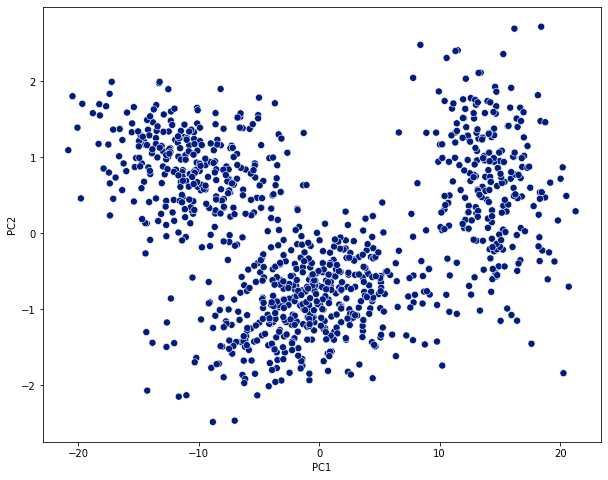

In [499]:
# plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 8))
sns_plot = sns.scatterplot(res['PC1'], res['PC2'], [0] * len(res), s=50, palette='dark', legend=False) # hue=res['Y']

In [500]:
# sns_plot.figure.savefig("/content/drive/My Drive/ML-Undergrad-Assignments-Projects/Assignment-3-PCA-EM/PCA-2D.png")

## EM algorithm

In [ ]:
np.random.seed(22)

In [ ]:
K = 3 ## no. of Gaussians

In [ ]:
X = convertedInput
print(X.shape)

(1000, 2)


## Step 1. Initialize values and compute log likelihood

In [ ]:
DEBUG = False

In [ ]:
"""
Parameters:
    i)   weights
    ii)  means
    iii) covariances

Hidden variables:
    i) 
"""
class GaussianEM:
    def __init__(self, K, epsilon=0.001):
        self.K = K
        self.epsilon = epsilon
        print("GaussianEM __init__(K = {})".format(self.K))
        
    ### Initializes parameters and hidden variables
    def initialize_variables(self, X):
        print(f"X.shape = {X.shape}")
        self.X = X
        self.N, self.D = X.shape
        ## np.random.randn(self.D, )  np.zeros(self.D)
        self.means = np.array([np.random.randn(self.D, ) for _ in range(self.K)]) ## list of K means, each means_k => (D, 1) or (D, ) size
        self.covariances = [np.random.randn(self.D, self.D) for _ in range(self.K)] ## list of K covariances, each cov_k => (D, D) size
        self.weights = np.array([(1/K) for _ in range(self.K)]) ## initialize as 1/K => use np array for easier normalization purposes

        print(f"self.means.shape = {self.means.shape}, self.covariances.len = {len(self.covariances)}, self.weights.shape = {self.weights.shape}")

        ## initially, compute once.
        self.compute_conditional_prob_ALL_Gauss()
    
    ### For each k_th Gaussian, return (N, 1) sized probability for ALL examples of data X i.e. N(X|mean_k, cov_k).
    def compute_conditional_prob_kth_Gauss(self, k):
        ## https://stackoverflow.com/questions/15616742/vectorized-way-of-calculating-row-wise-dot-product-two-matrices-with-scipy
        mean_k = self.means[k]
        cov_k = self.covariances[k]

        var_1 = X - mean_k ## (x_i - u_k) for all x_i
        var_2 = np.linalg.inv(cov_k) ## E_k inverse
        var_3 = (X - mean_k).T ## (x_i - u_k).T for all x_i

        product_left = np.dot(var_1, var_2)
        exponent = np.einsum('ij,ij->i', product_left, var_3.T) # np.sum(a*b_T, axis=1) # np.einsum('ij,ij->i', a, b_T)
        exp_vector = np.exp(
            -0.5 * exponent
        )
        denominator = np.sqrt(
            ((2*np.pi)**self.D) * np.abs(np.linalg.det(cov_k)) ## take absolute sign of determinant
        )
        return exp_vector/(denominator + self.epsilon)

    ## Computes conditional probabilities for ALL Gaussians
    def compute_conditional_prob_ALL_Gauss(self):
        self.conditional_prob_all_Gauss = np.asarray([self.compute_conditional_prob_kth_Gauss(k=k) for k in range(0, K)]) ## q
        self.conditional_prob_all_Gauss = self.conditional_prob_all_Gauss.T

        self.weighted_conditional_prob_all_Gauss = np.asarray([self.compute_conditional_prob_kth_Gauss(k=k)*self.weights[k] for k in range(0, K)]) ## q
        self.weighted_conditional_prob_all_Gauss = self.weighted_conditional_prob_all_Gauss.T

    ### Normalize each weights
    def normalize_weights(self):
        self.weights = self.weights/np.sum(self.weights)

    ### Expectation -> E-step, update hidden probabilities 'p'
    def step_expectation_E(self):
        self.compute_conditional_prob_ALL_Gauss()  ## compute q and wq matrices.
        self.hidden_probabilities = normalize(self.weighted_conditional_prob_all_Gauss, axis=1, norm='l1') ## l1 to make sum = 1, axis=1 for row wise ## axis=1: row
        if DEBUG:
            print(f"self.hidden_probabilities.shape = {self.hidden_probabilities.shape}")

    
    ### Maximization -> M-step, update each parameters with respect to hidden probabilities
    def step_maximization_M(self):
        ## Update means.
        mean_matrix = self.hidden_probabilities.T@self.X ## take transpose to get (K, N) * (N, D) -> (K, D)
        mean_matrix = mean_matrix / np.sum(self.hidden_probabilities.T, axis=1).reshape(-1, 1) ## row-wise sum and reshape to broadcast
        self.means = mean_matrix
        if DEBUG:
            print(f"self.means.shape = {self.means.shape}")

        # k = 0
        ## Update covariances for each k_th Gaussian
        for k in range(0, K):
            diff = self.X - self.means[k]
            
            diff = diff.reshape(diff.shape[0], 1, -1)
            b = diff.reshape(diff.shape[0], diff.shape[2], 1)

            c = b@diff
            
            probs = self.hidden_probabilities.T[k]
            probs = probs.reshape(probs.shape[0], 1, 1)
            
            p_x_product = probs*c
            numerator = np.sum(p_x_product, axis=0)
            denominator = np.sum(self.hidden_probabilities.T[k]).reshape(-1, 1)
            self.covariances[k] = numerator/(denominator + self.epsilon)

        ## Update weights and normalize.
        self.weights = np.sum(self.hidden_probabilities.T, axis=1) ## 1->row
        self.weights = self.weights/(self.hidden_probabilities.shape[0] + self.epsilon)


    ### Computes log likelihood using all Gaussian's params
    def compute_log_likelihood(self):
        if DEBUG:
            print(f"self.conditional_prob_all_Gauss.shape = {(self.conditional_prob_all_Gauss.shape)}")
            print(f"self.weighted_conditional_prob_all_Gauss.shape = {(self.weighted_conditional_prob_all_Gauss.shape)}")            

        row_wise_sum = np.sum(self.weighted_conditional_prob_all_Gauss, axis=1) ## axis=1 : row, axis=0 : column
        
        if DEBUG:
            print(f"row_wise_sum.shape = {row_wise_sum.shape}")

        log_likelihood = np.sum(np.log(row_wise_sum))
        return log_likelihood

#################################### Testing ####################################


In [ ]:
def appendAndReturn_DataframeRes(df_old, metrics_list):
    a_series = pd.Series(metrics_list, index=df_old.columns)
    df_old = df_old.append(a_series, ignore_index=True)
    return df_old

column_names =["Itr", "PrevLoss", "CurrLoss", "DelLoss"]

df_metrics = pd.DataFrame(columns = column_names)
print(df_metrics.head())

Empty DataFrame
Columns: [Itr, PrevLoss, CurrLoss, DelLoss]
Index: []


## Fitting script

In [ ]:
%%time
MAX_ITER = 10000
LIM_DELTA_LOSS = 0.01

em = GaussianEM(K=3) ## initialize with num of gaussians

em.initialize_variables(X=X) ## initialize data
em.normalize_weights() ## to make sum(w_k) = 1

itr = 0
log_likelihood = em.compute_log_likelihood() ## Compute iniital log likelihood
prev_log_likelihood = log_likelihood

while itr <= MAX_ITER:

    em.step_expectation_E() ## Expectation step
    em.step_maximization_M() ## Maximization step
    
    prev_log_likelihood = log_likelihood
    log_likelihood = em.compute_log_likelihood() ## Compute log likelihood
    
    change_loss = np.abs(np.abs(log_likelihood) - np.abs(prev_log_likelihood))
    # print(f"itr = {itr}, prev_log_likelihood = {prev_log_likelihood}, log_likelihood = {log_likelihood}, change_loss = {change_loss}")
    df_metrics = appendAndReturn_DataframeRes(df_old=df_metrics, metrics_list=[itr, prev_log_likelihood, log_likelihood, change_loss])

    if itr > 0 and change_loss < LIM_DELTA_LOSS:
        break

    itr += 1

GaussianEM __init__(K = 3)
X.shape = (1000, 2)
self.means.shape = (3, 2), self.covariances.len = 3, self.weights.shape = (3,)
CPU times: user 370 ms, sys: 295 ms, total: 665 ms
Wall time: 347 ms


In [ ]:
display(df_metrics)

,Itr,PrevLoss,CurrLoss,DelLoss
0,0.0,45400.367566,45400.367566,0.000000
1,1.0,45400.367566,-5045.955900,40354.411666
2,2.0,-5045.955900,-5013.329796,32.626105
3,3.0,-5013.329796,-5001.195479,12.134317
4,4.0,-5001.195479,-4992.066211,9.129268
...,...,...,...,...
74,74.0,-4597.574815,-4597.065531,0.509284
75,75.0,-4597.065531,-4596.870544,0.194987
76,76.0,-4596.870544,-4596.800157,0.070387
77,77.0,-4596.800157,-4596.775704,0.024452


In [ ]:
print(em.hidden_probabilities.shape, X.shape)
# gaussian_indices = []
# for i in range(0, len(X)):
#     max_idx = np.argmax(em.hidden_probabilities[i])
#     gaussian_indices.append(max_idx)

gaussian_indices = np.array([np.argmax(em.hidden_probabilities[i]) for i in range(0, len(X))])

(1000, 3) (1000, 2)


In [ ]:
print(np.unique(gaussian_indices, return_counts=True))

(array([0, 1, 2]), array([242, 299, 459]))


In [ ]:
res['GaussianIndex'] = gaussian_indices

In [ ]:
display(res)

,PC1,PC2,GaussianIndex
0,-9.944016,0.885257,1
1,-0.729497,-0.447695,2
2,18.518664,-0.224654,0
3,8.877271,0.039974,2
4,-8.994095,-0.018709,1
...,...,...,...
995,-2.967758,-0.631209,2
996,-4.600415,-0.913956,2
997,-12.414499,1.049807,1
998,-0.427104,-1.011785,2


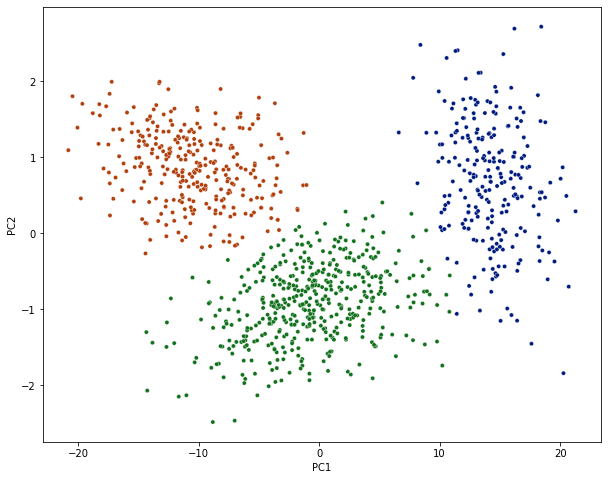

In [502]:
plt.figure(figsize=(10, 8))
sns_plot_2 = sns.scatterplot(x=res['PC1'], y=res['PC2'], hue=res['GaussianIndex'], size=[0]*len(res), s=50, palette='dark', legend=False)

In [498]:
# sns_plot_2.figure.savefig("/content/drive/My Drive/ML-Undergrad-Assignments-Projects/Assignment-3-PCA-EM/PCA-Clustered.png")

## Diagrams and matrices saving for report

In [ ]:
def appendAndReturn_DataframeRes(df_old, metrics_list):
    a_series = pd.Series(metrics_list, index=df_old.columns)
    df_old = df_old.append(a_series, ignore_index=True)
    return df_old

column_names =["k", "Mean_k", "Covar_k", "MixCoeff_k"]

df_gaussians = pd.DataFrame(columns = column_names)
print(df_gaussians.head())

Empty DataFrame
Columns: [k, Mean_k, Covar_k, MixCoeff_k]
Index: []


In [ ]:
em.covariances[0].ravel()

array([ 6.93163073, -0.47123919, -0.47123919,  0.66986255])

In [ ]:
df_gaussians['k'] = np.arange(len(em.means)) + 1 ## 1, 2, 3, ..., K
df_gaussians['Mean_k'] = em.means.tolist()
df_gaussians['Covar_k'] = em.covariances
df_gaussians['MixCoeff_k'] = em.weights

In [ ]:
display(df_gaussians)

,k,Mean_k,Covar_k,MixCoeff_k
0,1,"[14.229340233141968, 0.675032498010211]","[[6.931630734866614, -0.4712391882928779], [-0...",0.240585
1,2,"[-10.410410299650245, 0.856101242294714]","[[16.492199471252118, -0.6144441019908466], [-...",0.299693
2,3,"[-0.6600416766339946, -0.911358541814125]","[[21.989207227754452, 0.8289239438526239], [0....",0.459721


In [ ]:
# df_gaussians.to_csv("/content/drive/My Drive/ML-Undergrad-Assignments-Projects/Assignment-3-PCA-EM/DF-Gaussians.csv", index=False)

## Miscalenous Tests

In [ ]:
## https://stackoverflow.com/questions/8904694/how-to-normalize-a-2-dimensional-numpy-array-in-python-less-verbose

a = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9],
    [10,11,12],
    [13,14,15]
])

b = a[:, 0]


print(a.shape)
print(a)
print(b.shape)
print(b)

# c = (b*a.T).T

c = a/b.reshape(-1, 1)
print(c.shape)
print(c)


(5, 3)
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]
 [13 14 15]]
(5,)
[ 1  4  7 10 13]
(5, 3)
[[1.         2.         3.        ]
 [1.         1.25       1.5       ]
 [1.         1.14285714 1.28571429]
 [1.         1.1        1.2       ]
 [1.         1.07692308 1.15384615]]


In [ ]:
#@title Sample matrix operations for checking to compute N(x|u, E)

v1 = X - mean_0
v2 = np.linalg.inv(cov_0)
v3 = (X - mean_0).T
print(f"v1.shape = {v1.shape}, v2.shape = {v2.shape}, v3.shape = {v3.shape}")

p1 = np.dot(v1, v2)
print(f"p1.shape = {p1.shape}")

exponent = np.einsum('ij,ij->i', p1, v3.T) # np.sum(a*b_T, axis=1) # np.einsum('ij,ij->i', a, b_T)

print(f"exponent.shape = {exponent.shape}")

exp_vector = np.exp(exponent)
print(f"exp_vector.shape = {exp_vector.shape}")

denominator = np.sqrt(
    ((2*np.pi)**em.D) * (np.linalg.det(cov_0))
)
print(f"denominator = {denominator}")

whole_res = exp_vector/denominator
print(f"whole_res.shape = {whole_res.shape}")

# exponent = np.dot(np.dot(v1, v2), v3.T)
# print(f"exponent.shape = {exponent.shape}")

In [ ]:
#@title Smaller custom matrix operations checking
a = np.array([[5,6],[7,8],[9,10],[11,12]])
b = np.array([[1,2,3,4],[5,6,7,8]])
b_T = b.T

# print("a shape = ", a.shape)
# print("b shape = ", b.shape)
# print("b_T shape = ", b_T.shape)


v = np.sum(a*b_T, axis=1) # np.einsum('ij,ij->i', a, b_T)

# print(v.shape)
# print("--"*20)
# print(a)
# print(b)
# print(b_T)
# print("--"*20)
# print(v)

# print(f"v.shape = {v.shape}")


print(b)
eb = np.exp(b)
print(eb)